# Miniproyecto 2

En este Jupyter Notebook pueden implementar los códigos necesarios para resolver el **Miniproyecto 2**.

**Importante:** Recuerden que, como grupo, deben **adjuntar el código** en su entrega. En caso de que desarrollen parte del trabajo en este notebook pero **no lo incluyan en la entrega**, **toda la sección de calificación correspondiente al código será evaluada con cero**.

Tengan en cuenta que Coursera utiliza recursos compartidos entre todos los grupos, por lo tanto, si hay muchos equipos trabajando al mismo tiempo, los procesos pueden demorar más de lo previsto.

Pueden agregar todas las celdas de código que consideren necesarias para resolver el miniproyecto. **No hay un límite en este aspecto.**

In [1]:
# Espacio para desarrollar el código del miniproyecto 2

In [2]:
! pip install kagglehub
! pip install kagglehub[pandas-datasets]

In [4]:
! pip install tensorflow
! pip install keras

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.3-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.17.0-cp313-cp313-win_amd64.whl.metadata (34 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cache

In [5]:
import numpy as np
import random
import os
import tensorflow as tf
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)

In [6]:
import kagglehub
import os
import glob
import pandas as pd

path = kagglehub.dataset_download("yasserh/imdb-movie-ratings-sentiment-analysis")

for root, dirs, files in os.walk(path):
    for name in files:
        print(" -", os.path.join(root, name))

csv_files = glob.glob(f"{path}/**/*.csv", recursive=True)

if not csv_files:
    raise FileNotFoundError("No se encontró ningún archivo .csv en el dataset descargado.")

csv_path = csv_files[0]

data_raw = pd.read_csv(csv_path)

print("\nPrimeras 5 filas del dataset:")
print(data_raw.head())


 - C:\Users\mhgua\.cache\kagglehub\datasets\yasserh\imdb-movie-ratings-sentiment-analysis\versions\1\movie.csv

Primeras 5 filas del dataset:
                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


In [8]:
data = data_raw.copy()
data.shape

(40000, 2)

In [9]:
data.value_counts('label')

label
0    20019
1    19981
Name: count, dtype: int64

## Preprocesado

### Tokenizer

In [10]:
! pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mhgua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mhgua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mhgua\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
text = data['text'][0]
tokens = word_tokenize(text)
print(tokens)

['I', 'grew', 'up', '(', 'b', '.', '1965', ')', 'watching', 'and', 'loving', 'the', 'Thunderbirds', '.', 'All', 'my', 'mates', 'at', 'school', 'watched', '.', 'We', 'played', '``', 'Thunderbirds', "''", 'before', 'school', ',', 'during', 'lunch', 'and', 'after', 'school', '.', 'We', 'all', 'wanted', 'to', 'be', 'Virgil', 'or', 'Scott', '.', 'No', 'one', 'wanted', 'to', 'be', 'Alan', '.', 'Counting', 'down', 'from', '5', 'became', 'an', 'art', 'form', '.', 'I', 'took', 'my', 'children', 'to', 'see', 'the', 'movie', 'hoping', 'they', 'would', 'get', 'a', 'glimpse', 'of', 'what', 'I', 'loved', 'as', 'a', 'child', '.', 'How', 'bitterly', 'disappointing', '.', 'The', 'only', 'high', 'point', 'was', 'the', 'snappy', 'theme', 'tune', '.', 'Not', 'that', 'it', 'could', 'compare', 'with', 'the', 'original', 'score', 'of', 'the', 'Thunderbirds', '.', 'Thankfully', 'early', 'Saturday', 'mornings', 'one', 'television', 'channel', 'still', 'plays', 'reruns', 'of', 'the', 'series', 'Gerry', 'Anderso

### Stemming: SnowBallStemmer

In [12]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english") 
stemmer.stem(text)

'i grew up (b. 1965) watching and loving the thunderbirds. all my mates at school watched. we played "thunderbirds" before school, during lunch and after school. we all wanted to be virgil or scott. no one wanted to be alan. counting down from 5 became an art form. i took my children to see the movie hoping they would get a glimpse of what i loved as a child. how bitterly disappointing. the only high point was the snappy theme tune. not that it could compare with the original score of the thunderbirds. thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created. jonatha frakes should hand in his directors chair, his version was completely hopeless. a waste of film. utter rubbish. a cgi remake may be acceptable but replacing marionettes with homo sapiens subsp. sapiens was a huge error of judgment.'

### Embeddings: Tf-IDF Vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Pipeline completo de preprocesamiento

In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


In [15]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english'))

def preprocess_text_lemmatized(text):
    # 1. Limpieza con Regex
    text = re.sub(r'<[^>]+>', '', text)      # HTML tags
    text = re.sub(r'http\S+|www\S+', '', text) # URLs
    text = re.sub(r'\S+@\S+', '', text)      # Emails
    #text = re.sub(r'\d+', '', text)          # Números
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Puntuación y caracteres especiales
    text = text.lower()
    
    tokens = word_tokenize(text)
    
    lemmas = [lemmatizer.lemmatize(token) 
              for token in tokens 
              if token not in stop_words and len(token) > 2]
    
    # 4. Unión
    return ' '.join(lemmas)

# Lambda sobre la columna (usa la nueva función)
preprocessor = FunctionTransformer(lambda X: X.apply(preprocess_text_lemmatized))

# Pipeline (sin cambios en la estructura)
procesador = Pipeline([
    ('preprocessor', preprocessor)])

## Modelo

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split de datos
X = data['text']
y = data['label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=77)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=77)
#### segunda parte

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=77)
#---

print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)

Forma de X_train: (32000,)
Forma de X_val: (4000,)
Forma de X_test: (4000,)


In [18]:
X_train.shape

(32000,)

In [19]:
X_train[0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [20]:
y_train.shape

(32000,)

In [21]:
print(f"Primera frase: {X_train[0][0:100]}\n (.....) tiene el label {y_train[0]}")

Primera frase: I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played 
 (.....) tiene el label 0


### Transform

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import re

In [23]:
# Aplicar pipeline
X_train_pre = procesador.fit_transform(X_train) 
X_val_pre = procesador.transform(X_val)
X_test_pre = procesador.transform(X_test)

# Parámetros para tokenización y modelo
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM = 256
LSTM_UNITS = 32

# Tokenización en textos preprocesados
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_pre)  # Fit solo en train preprocesado

# to_sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_pre)
X_val_seq = tokenizer.texts_to_sequences(X_val_pre)
X_test_seq = tokenizer.texts_to_sequences(X_test_pre)

# Padear
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Verifica formas padded
print("Forma de X_train_padded:", X_train_padded.shape)
print("Forma de X_val_padded:", X_val_padded.shape)
print("Forma de X_test_padded:", X_test_padded.shape)

# Convierte y a arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

Forma de X_train_padded: (32000, 500)
Forma de X_val_padded: (4000, 500)
Forma de X_test_padded: (4000, 500)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,GRU
from tensorflow.keras import regularizers


model = Sequential([
    #Embedding
    Embedding(input_dim=MAX_VOCAB_SIZE,
              output_dim=EMBEDDING_DIM,
              input_length=MAX_SEQUENCE_LENGTH),
    # LSTM bidireccional para capturar contexto anterior y posterior
    Bidirectional(LSTM(LSTM_UNITS, return_sequences=False,
                       kernel_regularizer=regularizers.l2(1e-4), #Regularización L2
                       recurrent_regularizer=regularizers.l2(1e-4))),#Regularización L2                   
    # Regularización por Dropout
    Dropout(0.5),
    # Capa densa intermedia para mayor capacidad de representación
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    # Regularización #2 por Dropout
    Dropout(0.4),
    Dense(1, activation='sigmoid')])

# Compilar
model.compile(optimizer='adamax',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen
model.summary()

c:\Users\mhgua\anaconda3\envs\data\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train_padded, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_val_padded, y_val),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 202s 200ms/step - accuracy: 0.7970 - loss: 0.4445 - val_accuracy: 0.8733 - val_loss: 0.3284
Epoch 2/15
 346/1000 ━━━━━━━━━━━━━━━━━━━━ 1:57 180ms/step - accuracy: 0.8822 - loss: 0.3118

KeyboardInterrupt: 

In [ ]:
# Evaluar
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

125/125 [==============================] - 2s 15ms/step - loss: 0.3027 - accuracy: 0.8852
Test Accuracy: 0.8852


125/125 [==============================] - 2s 15ms/step
REPORTE DE CLASIFICACIÓN BINARIA
              precision    recall  f1-score   support

    Negativo      0.904     0.858     0.880      1967
    Positivo      0.869     0.911     0.890      2033

    accuracy                          0.885      4000
   macro avg      0.886     0.885     0.885      4000
weighted avg      0.886     0.885     0.885      4000


MATRIZ DE CONFUSIÓN
[[1688  279]
 [ 180 1853]]


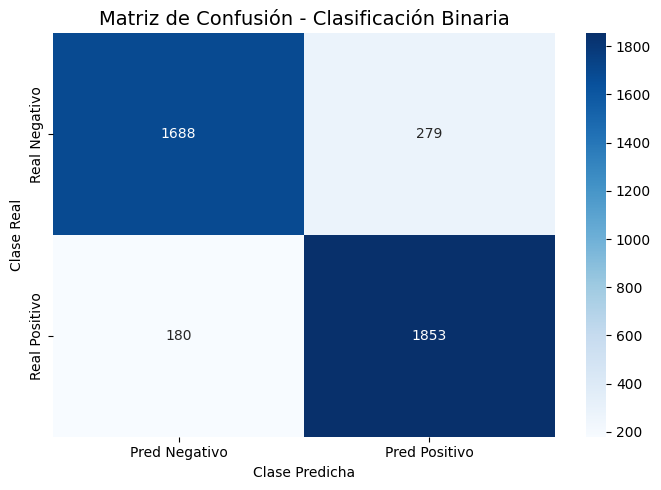


MÉTRICAS GLOBALES
Accuracy  : 88.52%
Precision : 86.91%
Recall    : 91.15%
F1-Score  : 88.98%

ACCURACY POR CLASE
Negativo: 85.82% (1688/1967)
Positivo: 91.15% (1853/2033)

CONFUSIONES MÁS FRECUENTES
Negativo clasificado como Positivo: 279 casos
Positivo clasificado como Negativo: 180 casos


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================
# 1. PREDICCIONES
# ==============================================================
y_pred_probs = model.predict(X_test_padded)
y_pred_classes = np.where(y_pred_probs > 0.5, 1, 0)  # Umbral binario
y_true_classes = np.array(y_test)  # Asegurar formato numpy

# ==============================================================
# 2. REPORTE DE CLASIFICACIÓN
# ==============================================================
class_names = ['Negativo', 'Positivo']

print("="*60)
print("REPORTE DE CLASIFICACIÓN BINARIA")
print("="*60)
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names, digits=3))

# ==============================================================
# 3. MATRIZ DE CONFUSIÓN
# ==============================================================
cm = confusion_matrix(y_true_classes, y_pred_classes)

print("\n" + "="*60)
print("MATRIZ DE CONFUSIÓN")
print("="*60)
print(cm)

# ==============================================================
# 4. VISUALIZACIÓN DE MATRIZ DE CONFUSIÓN
# ==============================================================
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Pred {cls}' for cls in class_names], 
            yticklabels=[f'Real {cls}' for cls in class_names])
plt.title('Matriz de Confusión - Clasificación Binaria', fontsize=14)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()
plt.show()

# ==============================================================
# 5. MÉTRICAS ADICIONALES
# ==============================================================
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n" + "="*60)
print("MÉTRICAS GLOBALES")
print("="*60)
print(f"Accuracy  : {accuracy*100:.2f}%")
print(f"Precision : {precision*100:.2f}%")
print(f"Recall    : {recall*100:.2f}%")
print(f"F1-Score  : {f1*100:.2f}%")

# ==============================================================
# 6. DETALLE POR CLASE
# ==============================================================
print("\n" + "="*60)
print("ACCURACY POR CLASE")
print("="*60)
for i, class_name in enumerate(class_names):
    class_acc = cm[i, i] / cm[i].sum() if cm[i].sum() > 0 else 0
    print(f"{class_name}: {class_acc*100:.2f}% ({cm[i, i]}/{cm[i].sum()})")

# ==============================================================
# 7. ERRORES (CONFUSIONES)
# ==============================================================
print("\n" + "="*60)
print("CONFUSIONES MÁS FRECUENTES")
print("="*60)
if fp > 0:
    print(f"Negativo clasificado como Positivo: {fp} casos")
if fn > 0:
    print(f"Positivo clasificado como Negativo: {fn} casos")
if fp == 0 and fn == 0:
    print("No hubo confusiones — desempeño perfecto en el conjunto de prueba ✅")


In [ ]:
def visualization_history(resultsFit):
    """
    Esta función grafica las curvas de pérdida a lo largo de las épocas de entrenamiento
    para el conjunto de prueba como el de validación.
    Parámetros:
    resultsFit = historial de entrenamiento de un modelo en keras
    Salida:
    Gráfica de la precisión en validación y prueba.
    """
    # Llamado al entrono de la gráfica y fijar tamaño de visualización
    fig, axes = plt.subplots(1, 1, figsize=(13, 4))

    # Graficar la pérdida de la historia en entrenamiento
    axes.plot(range(len(resultsFit.history['loss'])), resultsFit.history['loss'],
           '#5a2ff4', linestyle = "-", marker = ".",
           label='Pérdida entrenamiento', lw = 2)

    # Graficar la presición de la historia en validación
    axes.plot(range(len(resultsFit.history['val_loss'])), resultsFit.history['val_loss'],  '#60d13e',
           label='Pérdida validación', linestyle = '-', marker = '.', lw =2)

    # Títulos de los ejes
    axes.set_xlabel('Época',fontsize=12)
    axes.set_ylabel(r'Pérdida',fontsize=12)
    axes.grid()      # Activar la cuadricula
    axes.legend(fontsize=12,loc = 'upper right')   # Establecer la legenda


    plt.tight_layout() # Ajusta automáticamente el diseño de la figura
    plt.show()

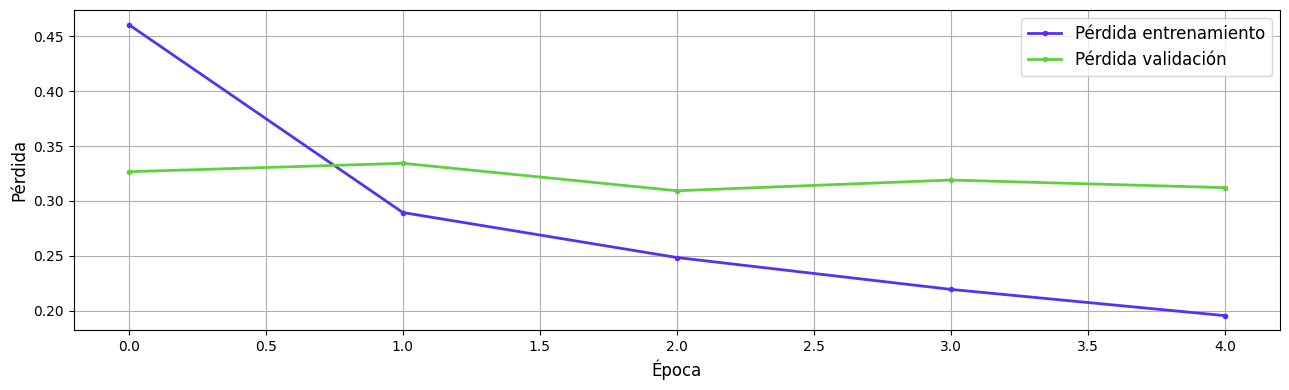

In [ ]:
# Llamado a la función de visualización de las métricas de la historia del entrenamiento
# del modelo.
import matplotlib.pyplot as plt
visualization_history(history)

# Análisis cualitativo